In [3]:

import sys
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.backends.backend_pdf import PdfPages

sys.path.append('../')

n_max=15

indices = [i for i in range(0,7*n_max,7)]
run=10


In [4]:
#rank statistics for the whole time frame
wis_rank=np.zeros((run,n_max))
rmse_rank=np.zeros((run,n_max))
wis_rank_sum=np.zeros((n_max))
rmse_rank_sum=np.zeros((n_max))

#rank statistics for the high case time frame
wis_rank_high=np.zeros((run,n_max))
rmse_rank_high=np.zeros((run,n_max))
wis_rank_sum_high=np.zeros((n_max))
rmse_rank_sum_high=np.zeros((n_max))


for i,lam_i in enumerate(indices):

    if lam_i == 0:
        lam_i = 1

    # load csv data file
    wis=np.genfromtxt('WIS_trueT_'+str(lam_i)+'.csv', delimiter=' ')
    rmse=np.genfromtxt('RMSE_trueT_'+str(lam_i)+'.csv', delimiter=' ')
    wis_high=np.genfromtxt('WIS_trueT_'+str(lam_i)+'_k.csv', delimiter=' ')
    rmse_high=np.genfromtxt('RMSE_trueT_'+str(lam_i)+'_k.csv', delimiter=' ')

    for j in range(run):
        # ranke each row in the csv file
        ind = np.argsort(wis[:,j])
        rank=np.empty_like(ind)
        rank[ind]=np.arange(len(wis[:,0]))
        wis_rank[j,:]=rank
        
        ind = np.argsort(rmse[:,j])
        rank[ind]=np.arange(len(rmse[:,0]))
        rmse_rank[j,:]=rank

        ind = np.argsort(wis_high[:,j])
        rank[ind]=np.arange(len(wis_high[:,0]))
        wis_rank_high[j,:]=rank

        ind = np.argsort(rmse_high[:,j])
        rank[ind]=np.arange(len(rmse_high[:,0]))
        rmse_rank_high[j,:]=rank
    
    # sum the rank of each model
    wis_rank_sum+=np.sum(wis_rank,axis=0)
    rmse_rank_sum+=np.sum(rmse_rank,axis=0)

    wis_rank_sum_high+=np.sum(wis_rank_high,axis=0)
    rmse_rank_sum_high+=np.sum(rmse_rank_high,axis=0)




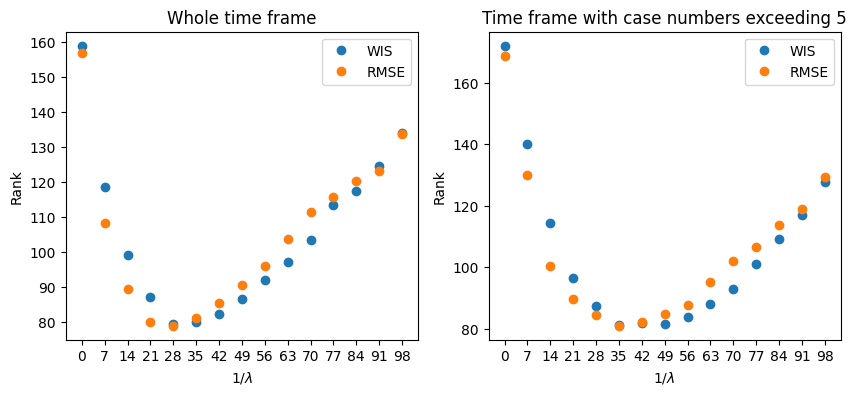

In [5]:
#plot the rank statistics for the whole time frame on the left
#plot the rank statistics for the high case time frame on the right
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(wis_rank_sum/run,  'o',label='WIS')
ax[0].plot(rmse_rank_sum/run, 'o', label='RMSE')
ax[0].set_xlabel('1/$\lambda$')
ax[0].set_ylabel('Rank')
ax[0].set_title('Whole time frame')
ax[0].set_xticks(range(n_max), indices)
ax[0].legend()
ax[1].plot(wis_rank_sum_high/run, 'o',label='WIS')
ax[1].plot(rmse_rank_sum_high/run, 'o', label='RMSE')
ax[1].set_xlabel('1/$\lambda$')
ax[1].set_ylabel('Rank')
ax[1].set_title('Time frame with case numbers exceeding 5')
ax[1].set_xticks(range(n_max), indices)
ax[1].legend()
plt.show()
fig.savefig('fig_wrong_lam_RMSE_WIS_rank.png',dpi=300)

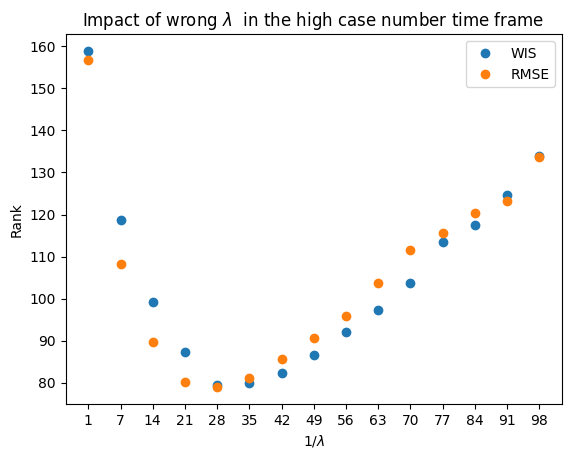

In [6]:
#plot dots
plt.plot(wis_rank_sum/run, 'o')
plt.plot(rmse_rank_sum/run, 'o')
#use indices as x-axis
indices[0]=1
plt.xticks(range(n_max), indices)
plt.xlabel('1/$\lambda$')
plt.ylabel('Rank')
plt.title('Impact of wrong $\lambda$  in the high case number time frame ')
plt.legend(['WIS','RMSE'])
plt.savefig('fig_wrong_lam_RMSE_WIS_high_case.png',dpi=300)

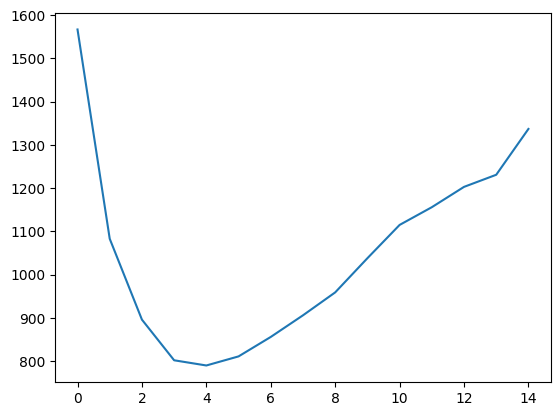

In [7]:
plt.plot(rmse_rank_sum, label='RMSE')

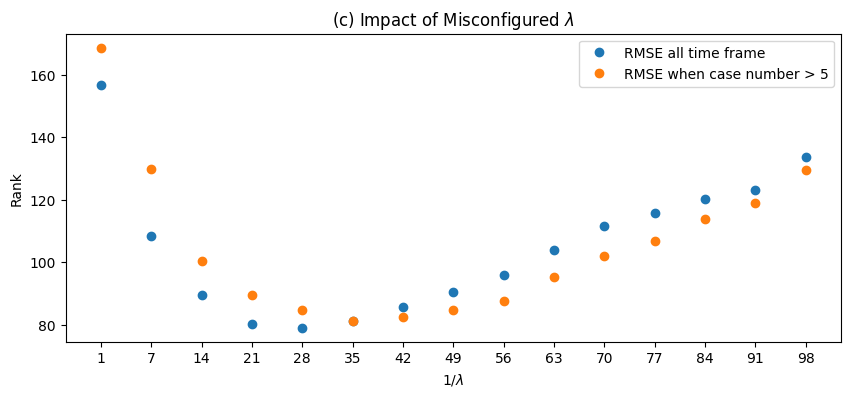

In [12]:
#plot the rank statistics for the whole time frame on the left
#plot the rank statistics for the high case time frame on the right
fig, ax = plt.subplots(1,1,figsize=(10,4))

ax.plot(rmse_rank_sum/run, 'o', label='RMSE all time frame')
ax.plot(rmse_rank_sum_high/run, 'o', label='RMSE when case number > 5')
ax.set_xlabel('1/$\lambda$')
ax.set_ylabel('Rank')
ax.set_title('(c) Impact of Misconfigured $\lambda$')
ax.set_xticks(range(n_max), indices)
ax.legend()
plt.show()
fig.savefig('fig_wrong_lam_RMSE_WIS_rank.png',dpi=300)